In [67]:
# Step 0: Import required libraries for data handling, computation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
#Step 1: Import Machine Learning Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [69]:
#Step 2: Load Dataset and Inspect It
df = pd.read_excel("diabetes_binary_health_indicators_BRFSS2015.xlsx")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [70]:
df.shape

(253680, 22)

In [71]:
df['Diabetes_binary'].value_counts()

Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64

In [72]:
#Step 3: Separate Features and Target
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

In [73]:
#Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [74]:
#Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
#Step 6: Train Logistic Regression Model
model = LogisticRegression(class_weight='balanced',max_iter=1000,solver='liblinear')
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [ ]:
#Step 7: Make Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [77]:
#Step 8: Evaluate Baseline Performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[31737 11930]
 [ 1689  5380]]
              precision    recall  f1-score   support

           0       0.95      0.73      0.82     43667
           1       0.31      0.76      0.44      7069

    accuracy                           0.73     50736
   macro avg       0.63      0.74      0.63     50736
weighted avg       0.86      0.73      0.77     50736



In [78]:
roc_auc_score(y_test, y_proba)

np.float64(0.8196294476144469)

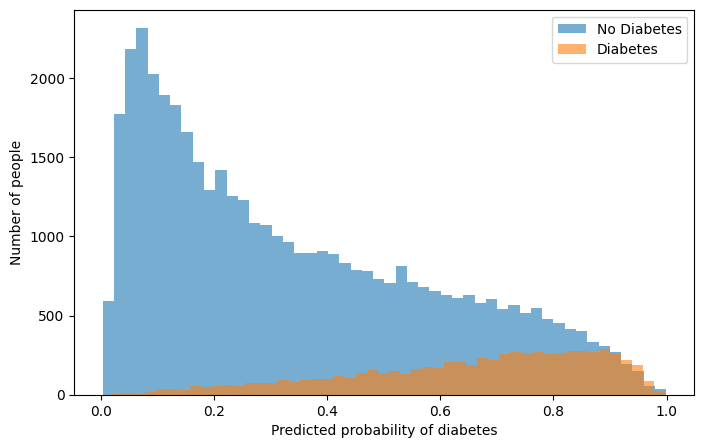

In [79]:
#Step 9: Visualize Probability Distributions
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(y_proba[y_test == 0], bins=50, alpha=0.6, label="No Diabetes")
plt.hist(y_proba[y_test == 1], bins=50, alpha=0.6, label="Diabetes")
plt.xlabel("Predicted probability of diabetes")
plt.ylabel("Number of people")
plt.legend()
plt.show()

In [80]:
#Step 10: Threshold Adjustment
y_pred_03 = (y_proba >= 0.3).astype(int)

In [81]:
print(confusion_matrix(y_test, y_pred_03))
print(classification_report(y_test, y_pred_03))

[[22956 20711]
 [  585  6484]]
              precision    recall  f1-score   support

           0       0.98      0.53      0.68     43667
           1       0.24      0.92      0.38      7069

    accuracy                           0.58     50736
   macro avg       0.61      0.72      0.53     50736
weighted avg       0.87      0.58      0.64     50736



In [82]:
#Step 11: Coefficient Interpretation
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coeff_df

,Feature,Coefficient
13,GenHlth,0.618348
3,BMI,0.490480
18,Age,0.457022
0,HighBP,0.364563
1,HighChol,0.287323
2,CholCheck,0.248962
17,Sex,0.139267
6,HeartDiseaseorAttack,0.073116
5,Stroke,0.037274
16,DiffWalk,0.037265


In [83]:
coeff_df["Odds_Ratio"] = np.exp(coeff_df["Coefficient"])
coeff_df = coeff_df.sort_values(by="Odds_Ratio", ascending=False)

coeff_df


,Feature,Coefficient,Odds_Ratio
13,GenHlth,0.618348,1.855859
3,BMI,0.490480,1.633100
18,Age,0.457022,1.579364
0,HighBP,0.364563,1.439884
1,HighChol,0.287323,1.332854
2,CholCheck,0.248962,1.282693
17,Sex,0.139267,1.149430
6,HeartDiseaseorAttack,0.073116,1.075855
5,Stroke,0.037274,1.037977
16,DiffWalk,0.037265,1.037968


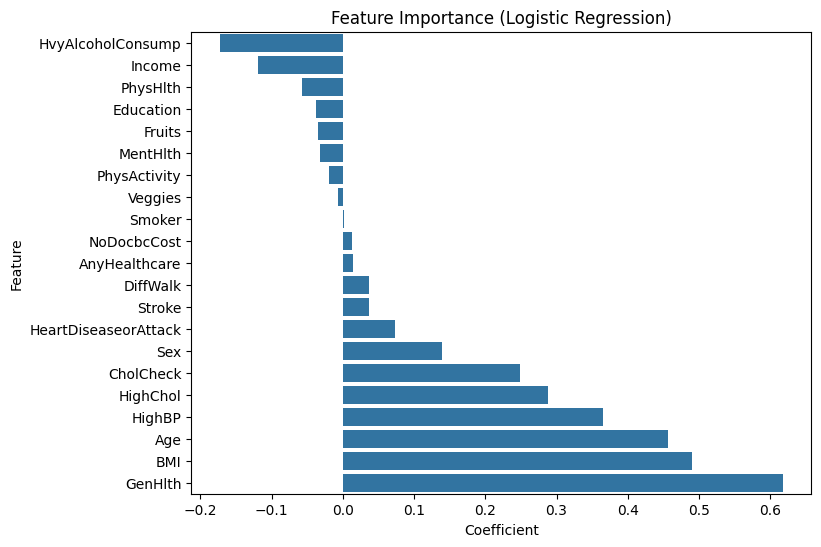

In [84]:
plt.figure(figsize=(8,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=coeff_df.sort_values(by='Coefficient')
)
plt.title("Feature Importance (Logistic Regression)")
plt.show()


In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
#Step 12: Train Random Forest Model
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [87]:
rf_proba = rf.predict_proba(X_test)[:, 1]

In [88]:
from sklearn.metrics import roc_auc_score

roc_auc_rf = roc_auc_score(y_test, rf_proba)
roc_auc_rf

np.float64(0.7942018427811068)

In [89]:
rf_pred_03 = (rf_proba >= 0.3).astype(int)

In [90]:
print(confusion_matrix(y_test, rf_pred_03))
print(classification_report(y_test, rf_pred_03))

[[38270  5397]
 [ 3768  3301]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     43667
           1       0.38      0.47      0.42      7069

    accuracy                           0.82     50736
   macro avg       0.64      0.67      0.66     50736
weighted avg       0.84      0.82      0.83     50736



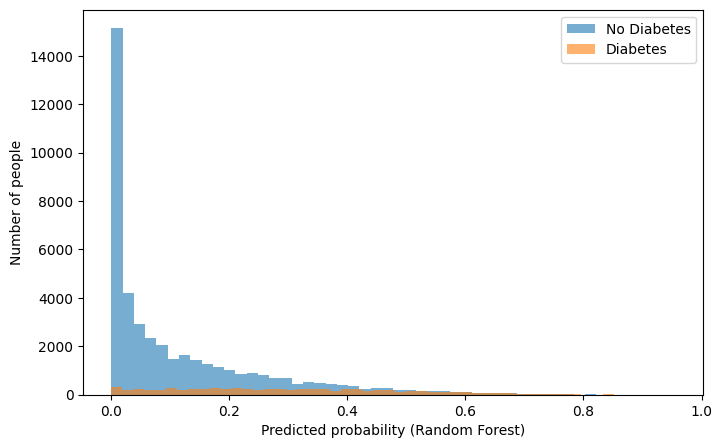

In [91]:
#Step 13: Visualize Probability Distributions
plt.figure(figsize=(8,5))
plt.hist(rf_proba[y_test == 0], bins=50, alpha=0.6, label="No Diabetes")
plt.hist(rf_proba[y_test == 1], bins=50, alpha=0.6, label="Diabetes")
plt.xlabel("Predicted probability (Random Forest)")
plt.ylabel("Number of people")
plt.legend()
plt.show()


In [92]:
#Step 14: Coefficient Interpretation
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

importances

,Feature,Importance
3,BMI,0.172395
18,Age,0.126460
13,GenHlth,0.105604
20,Income,0.084820
0,HighBP,0.077213
15,PhysHlth,0.070391
19,Education,0.058637
14,MentHlth,0.053476
1,HighChol,0.039082
8,Fruits,0.028066


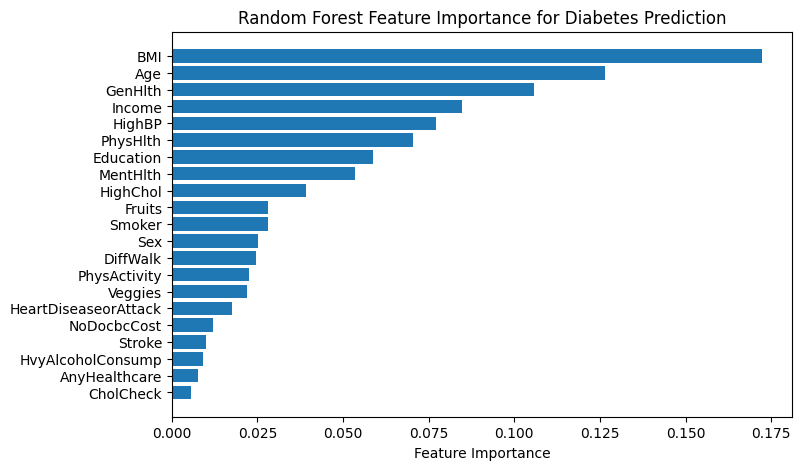

In [93]:
plt.figure(figsize=(8, 5))
plt.barh(importances["Feature"], importances["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance for Diabetes Prediction")
plt.show()